# Restricted Boltzmann Machine Walkthrough. PyTorch implementation

**NOTE** This walkthrough is heavily inspired by [this tutorial](https://heartbeat.fritz.ai/guide-to-restricted-boltzmann-machines-using-pytorch-ee50d1ed21a8), a very clear introductory guide to Restricted Boltzmann Machines in PyTorch by Dr. Derrick Mwiti. There a different data set is used, however. I modified the first stages of data loading an preprocessing so that the same device can work on a MNIST data set. A more comprehensive and broader account on this latter is given in [this other tutorial](https://github.com/iam-mhaseeb/Multi-Layer-Perceptron-MNIST-with-PyTorch/blob/master/mnist_mlp_exercise.ipynb), in which a Feedforward MLP is built and trained on the MNIST data set. Note also that the data set is loaded with the `torch.utils.data.DataLoader` utility method provided by PyTorch.


### Useful dependencies

PyTorch, NumPy and Matplotlib are used for tensor manipulation, computing and plotting.

In [1]:
import os
import sys
sys.path.append(os.getcwd() + r'\utils')

import images_utils as iu
import rbm_utils as ru

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

### Data loading and preprocessing

Data samples must be vectorized. That is, the real-valued data instances are binarized, so that they are amenable to a binary units Restricted Boltzmann Machine. 

The binarization threshold is arbitrary, here set to `3.5`. A grid of samples plots before and after this vectorization step is displayed below.

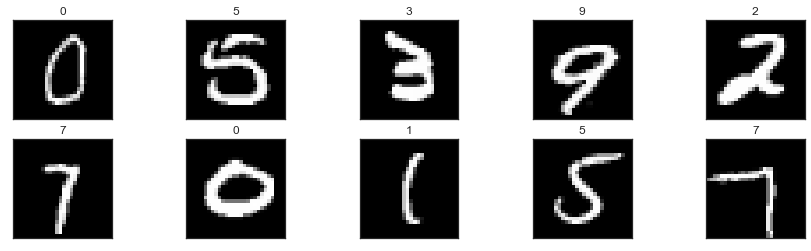

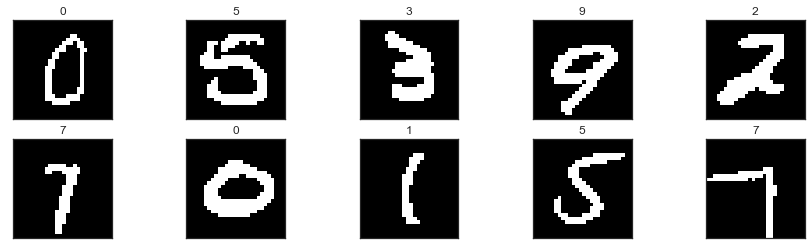

In [2]:
batch_size = 300

transforms = transforms.Compose([transforms.ToTensor()])

train_data = MNIST('data/', download = True, train = True, transform = transforms)
test_data  = MNIST('data/', download = True, train = False, transform = transforms)

train_load = DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_load  = DataLoader(test_data, batch_size = batch_size, shuffle = True)

data_iter = iter(train_load)
images, labels = data_iter.next()

iu.images_plot(images, labels)
images = iu.binarize_digits(images, factor = 3.5)
iu.images_plot(images, labels)

### Parameters and hyper-parameters

Sensible parameters should be set to grant convergence as well as avoid local minima and speed up training also in proximity of ravines in the cost landscape. The following choice of parameters such as learning rate, momentum, alongside with the dimension of the hidden layer and number of Gibbs chain steps to perform, seem to be a reasonable combination. 

Recall, some rules of thumb are
* Set the learning rate so that weights updates magnitudes are about $10^{-3}$ of the weights themselves
* Momentum should be increased from 0.5 to 0.9 ideally in the course of training
* Weights decay should be small

Moreover, even if CD-1 has proven to suffice, here I thought wiser to perform more Monte Carlo steps, to approach the equilibrium distribution

Training start: 2019-12-15 16:33:27.696732
Epoch 1 	 Training loss = 0.130002
---
Epoch 2 	 Training loss = 0.098961
---
Epoch 3 	 Training loss = 0.091827
---
Epoch 4 	 Training loss = 0.087290
---
Epoch 5 	 Training loss = 0.084268
---
Epoch 6 	 Training loss = 0.082060
---
Epoch 7 	 Training loss = 0.080413
---
Epoch 8 	 Training loss = 0.079079
---
Epoch 9 	 Training loss = 0.078016
---


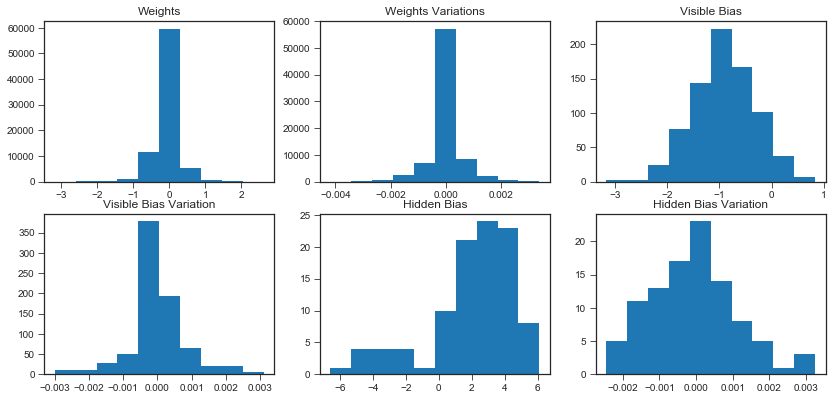

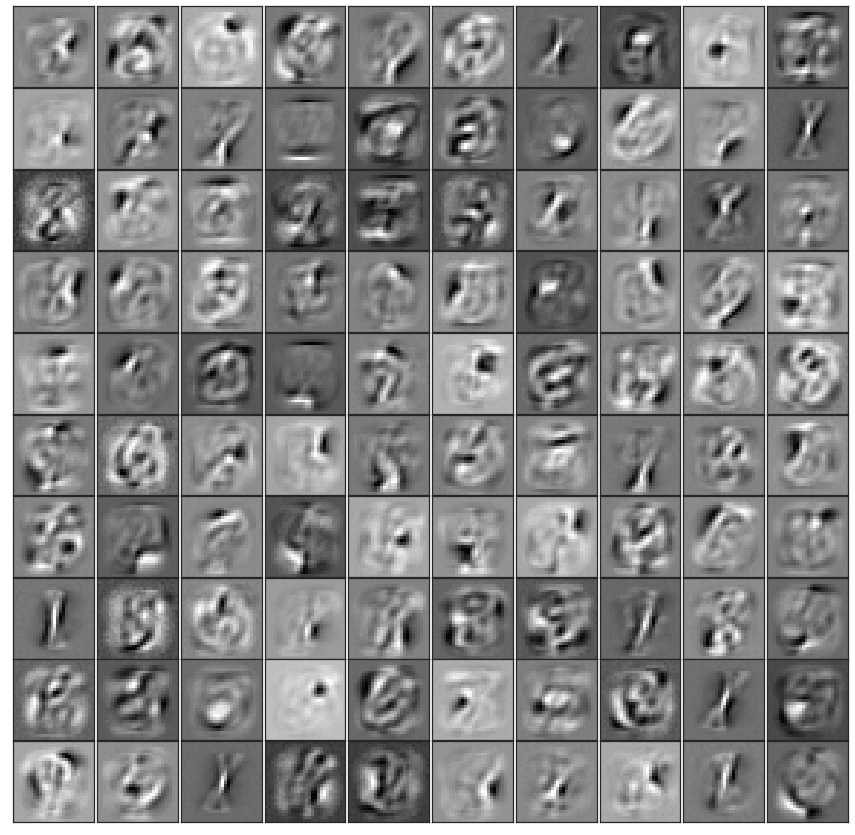

Epoch 10 	 Training loss = 0.077021
---
Epoch 11 	 Training loss = 0.076333
---
Epoch 12 	 Training loss = 0.075481
---
Epoch 13 	 Training loss = 0.075044
---
Epoch 14 	 Training loss = 0.074389
---
Epoch 15 	 Training loss = 0.073855
---
Epoch 16 	 Training loss = 0.073484
---
Epoch 17 	 Training loss = 0.073112
---
Epoch 18 	 Training loss = 0.072639
---
Epoch 19 	 Training loss = 0.072379
---


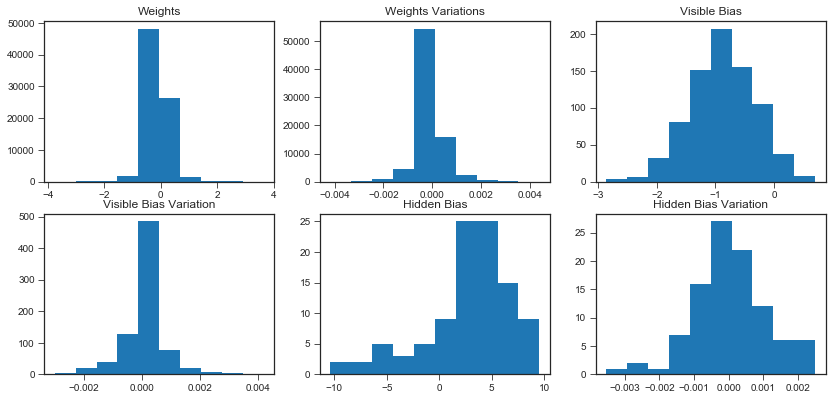

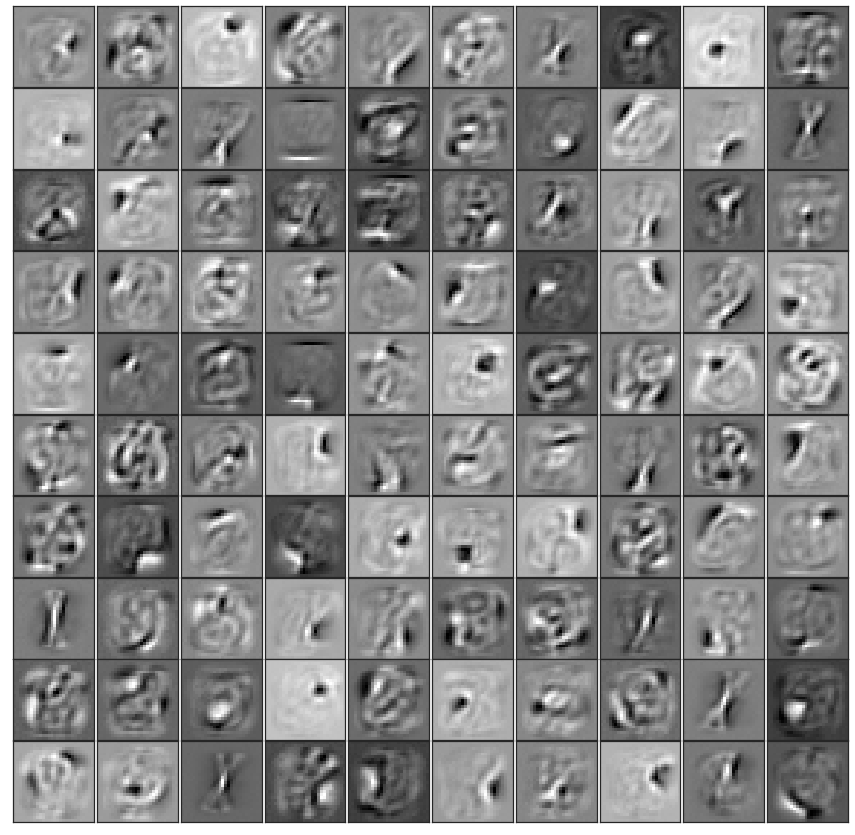

Epoch 20 	 Training loss = 0.072001
---
Training end 2019-12-15 17:22:04.406254


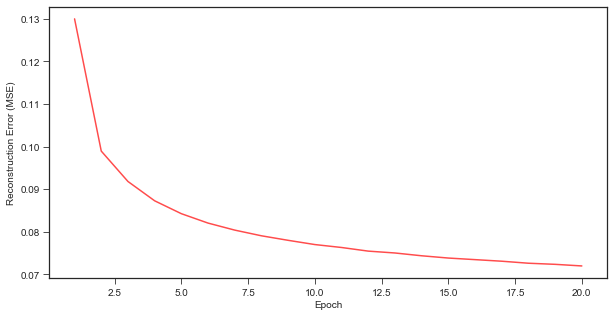

In [3]:
images = images.view(-1, images.shape[2] * images.shape[3])
visible_dim = images.shape[1]
hidden_dim = 100
epochs = 20
mcmc_steps = 50
learning_rate = 0.0001
momentum = 0.8
weight_decay = 0.00001

rbm = ru.RBM(visible_dim, hidden_dim)
rbm.train(train_load, epochs, learning_rate, weight_decay, momentum, mcmc_steps)

### Model evaluation

Below `2x5` grids of digits plots are displayed. For each such panel, the reconstructions are also depicted. Note that reconstructions are noisier in the best cases and wrong or hardly-understandable for other instances.

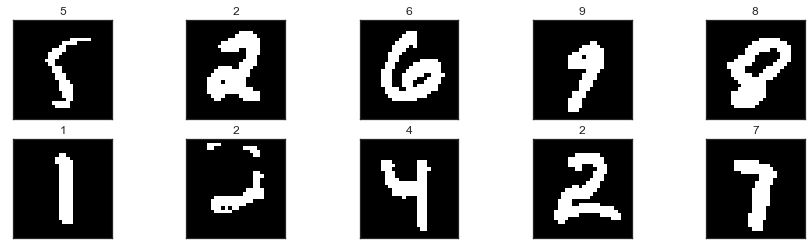

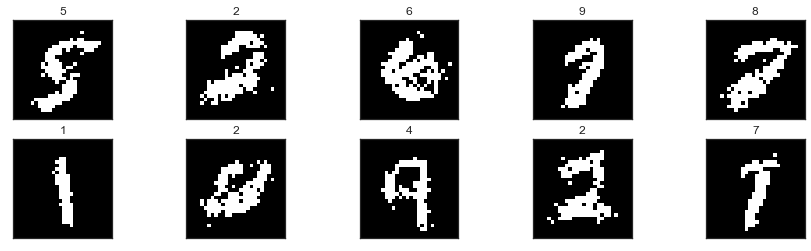

Test loss = 0.000402


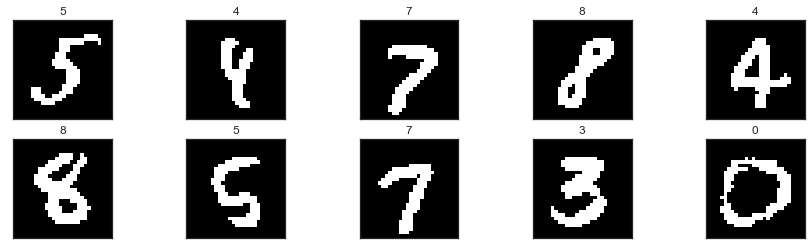

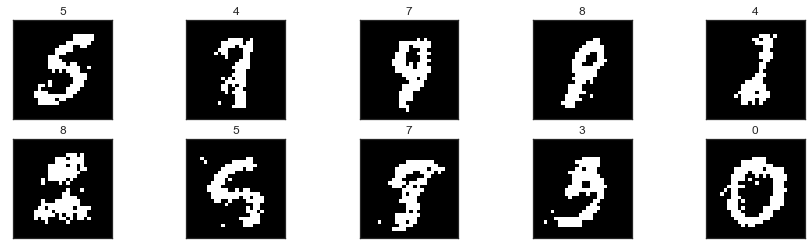

Test loss = 0.000388


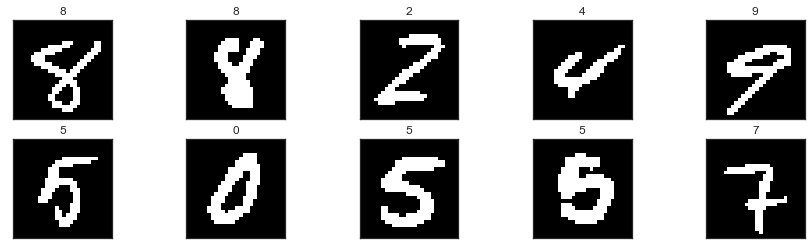

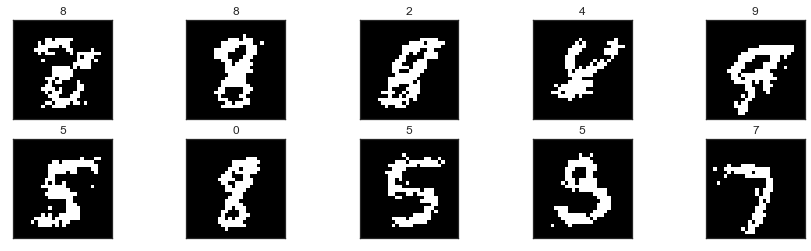

Test loss = 0.000399


In [4]:
data_iter = iter(test_load)

for i in range(3):
    data,labels = data_iter.next()
    
    samples = data.view(-1, data.shape[2] * data.shape[3])
    samples = iu.binarize_digits(samples, factor = 3.5)
    rbm.generate_samples(samples,labels)
#end

## Final Remarks
Results of the simulation may seem satisfactory, since most of the digits are correctly reconstructed. However, some of them are poorly recreated.

As expected, the reconstruction error drop sharply in the early stages of training and then stabilizes (Hinton, 2010).

Again, a plain binary RBM may convey too few abstraction capabilities to properly learn the distribution of data such as the MNIST ones. In addition, note that the labels on the reconstruction plots may be misleading, since the task is not to classify, to correctly recognize a digit, but rather to reconstruct, to perform perceptual inference and generation.